In [1]:
cd /mnt/scratch/metric-synth-runs/

/mnt/scratch/metric-synth-runs


In [2]:
import shared
from shared import load_joblog
import pandas as pd
import matplotlib.pyplot as plt
import os


plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [r"\documentclass[acmsmall,review,timestamp]{acmart}"]
        ),
    }
)
pd.set_option('display.max_rows', 500)

def load_sketch(logs):
    dfs = []
    for log in logs.split(","):
        name = os.path.basename(log)
        dfs.append(load_joblog(log, name))
    return pd.concat(dfs)

In [3]:
csg_metric = '2022-10-31-19:51:16'

joblog_df = load_joblog('csg-abs-and-enum')
joblog_df = joblog_df[
    (joblog_df["method"] == "abstract_norepl")
    | (joblog_df["method"] == "abstract")
    | (joblog_df["method"] == "enumerate")
]

metric_joblog_df = load_joblog(csg_metric)
sketch_joblog_df1 = load_joblog('csg-sketch-1', name='sketch_joblog')
sketch_joblog_df2 = load_joblog('csg-sketch-2')
sketch_joblog_df = pd.concat([sketch_joblog_df1, sketch_joblog_df2])

joblog_df = pd.concat([
    sketch_joblog_df1, 
    sketch_joblog_df2,
    metric_joblog_df,
    joblog_df
])


set(joblog_df['method'])
joblog_df[joblog_df['method'] == 'metric']

,Seq,Host,Starttime,JobRuntime,Send,Receive,Exitval,Signal,Command,method,status,bench,bench_kind,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time
0,2,:,1.667246e+09,1.562,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,circle_repl,Hand-written,0.000130,1.547353,0.170425,0.000249,0.008517,1.118683
1,1,:,1.667246e+09,1.669,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,two_circle,Hand-written,0.077430,1.570866,0.217453,0.005430,0.008878,1.093401
2,15,:,1.667246e+09,7.216,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,three_circle,Hand-written,0.077573,7.067268,0.456702,0.054502,0.009394,5.138489
3,3,:,1.667246e+09,9.072,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,skew,Hand-written,0.057186,8.989038,1.608689,0.005793,0.010287,5.573408
4,5,:,1.667246e+09,9.239,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,letter_h,Hand-written,0.010801,9.200203,1.794220,0.003915,0.010858,5.592614
5,6,:,1.667246e+09,9.968,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,letter_o,Hand-written,0.161958,9.742566,1.542140,0.036647,0.008006,6.208693
6,7,:,1.667246e+09,10.315,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,fence,Hand-written,0.245211,9.700116,2.110129,0.343826,0.153668,5.800463
7,4,:,1.667246e+09,10.402,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,zigzag,Hand-written,1.550885,8.499341,0.875979,0.328877,0.010683,5.616100
8,13,:,1.667246e+09,10.425,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,letter_e,Hand-written,0.739189,9.601419,2.537677,0.059383,0.008695,5.340938
9,16,:,1.667246e+09,17.253,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,bench_0,Generated,0.093524,16.598247,2.137827,0.531644,0.008368,10.062878


In [4]:
n_bench = 40
assert(len(list(joblog_df[joblog_df['method'] == 'metric']['Command'])) == n_bench)

Std solved:  28


<Figure size 432x288 with 0 Axes>

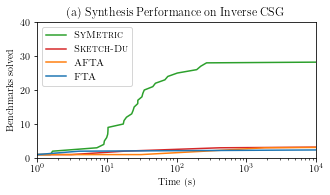

In [75]:
timeout_time = 1e10
def plot(df):
    plt.tight_layout()
    fig = plt.figure(figsize=(5, 2.5))
    ax = fig.add_subplot(1, 1, 1)
    
    joblog_df.loc[joblog_df['status'] != 'success', 'JobRuntime'] = float('nan')
    df = df.groupby(['method', 'bench'])['JobRuntime'].max()
    std = df.xs('metric')
    print("Std solved: ", len(std.dropna()))
    std = std.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(std) + [1e10], range(0, len(std) + 2), label=r"\textsc{SyMetric}", color="C2"
    )
    
    sketch = df.xs('sketch')
    sketch = sketch.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(sketch) + [1e10], range(0, len(sketch) + 2), label=r"\textsc{Sketch-Du}", color="C3"
    )
    
    absn = df.xs('abstract_norepl')
    absn = absn.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(absn) + [1e10], range(0, len(absn) + 2), label=r"\textsc{AFTA}", color="C1"
    )
    
    enum = df.xs('enumerate')
    enum = enum.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(enum) + [1e10], range(0, len(enum) + 2), label=r"\textsc{FTA}", color="C0"
    )

    """
    en = enum["runtime"]
    en = en.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(en),
        range(0, len(en) + 1),
        label=r"\textsc{Enumeration}",
        color="C0",
    )

    abstr = abst["runtime"]
    abstr = abstr.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(abstr),
        range(0, len(abstr) + 1),
        label=r"\textsc{Syngar}",
        color="C1",
    )
    """

    ax.set_ylim([0, n_bench])
    ax.set_xlim([1e0, 1e4])
    ax.set_xscale('log')
    ax.set_ylabel("Benchmarks solved")
    ax.set_xlabel("Time (s)")
    plt.legend(loc="upper left")
    ax.set_title(r"(a) Synthesis Performance on Inverse CSG")
    plt.savefig('/home/feser/634da4c60a6e2fe917f357dc/metric_synth/csg_comparison.pdf', bbox_inches='tight')
plot(joblog_df)

In [72]:
def plot_method(df, ax, dff, label):
    dff = dff.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(dff),
        range(0, len(dff) + 1),
        label=f"\\textsc{{{label}}}",
    )

def plot_extract(df):
    plt.tight_layout()
    fig = plt.figure(figsize=(7, 2.5))
    ax = fig.add_subplot(1, 1, 1)
    df = df[df['bench'].str.startswith('bench')]
    df.loc[~df['success'], 'runtime'] = 1e10
    df = df.groupby(['method', 'bench', 'exhaustive_width']).max().reset_index()
    
    plot_method(df, ax, df[df["method"] == "metric"]["runtime"], "SyMetric")
    plot_method(df, ax, df[df["method"] == "metric-extractrandom"]["runtime"], "Extract random")
    plot_method(df, ax, df[df["method"] == "metric-repairrandom"]["runtime"], "Repair random")
    plot_method(df, ax, df[df["method"] == "metric-norank"]["runtime"], "No Rank")
    plot_method(df, ax, df[df["method"] == "metric-nocluster"]["runtime"], "No Cluster")
    plot_method(df, ax, df[df["method"] == "metric-simpledist"]["runtime"], "Simple distance")

    ax.set_ylabel("Benchmarks solved")
    ax.set_xlabel("Time (s)")
    ax.set_title(r"Effect of Ablations on \textsc{SyMetric} Performance")
    ax.set_xlim(5, 1300)
    ax.set_xscale('log')
    ax.legend(loc="upper left", ncol=3)
    plt.savefig('/home/feser/634da4c60a6e2fe917f357dc/metric_synth/csg_ablations.pdf', bbox_inches='tight')

    return ax


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 26040.99it/s]


<AxesSubplot:title={'center':'Effect of Ablations on \\textsc{SyMetric} Performance'}, xlabel='Time (s)', ylabel='Benchmarks solved'>

<Figure size 432x288 with 0 Axes>

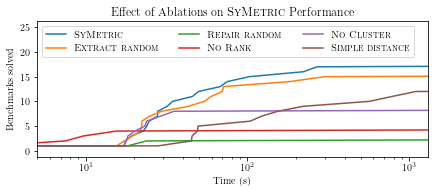

In [73]:
df = shared.load(csg_metric)
plot_extract(df)

In [49]:
def method_table(df, 
                 fields=('xfta_time', 
                         'extract_time', 
                         'repair_time', 
                         'expansion_time',
                         'cluster_time', 
                         'rank_time'), 
                 **kwargs):
    df = df[(df["method"] == "metric") & (df["status"] == "success")]
    dfg = df.groupby('bench_kind').agg(["median", "max"])
    
    print(
        r"""
    \begin{tabular}{lrrrrrr}
    \toprule
    Benchmark & \textsc{ConstructXFTA} & \textsc{Extract} & \textsc{Repair} & Expansion & Clustering & Ranking \\
    \midrule
    """,
        **kwargs
    )
    for kind in ['Generated', 'Hand-written']:
        cols = []
        for field in fields:
            cols.append('{:.1f}/{:.1f}'.format(
                float(dfg.loc[kind][field]['median']),
                float(dfg.loc[kind][field]['max'])))
        print(' & '.join([kind] + cols) + '\\\\', **kwargs)
    
    dfg = df[(df["method"] == "metric") & (df["status"] == "success")].agg(
        ["median", "max"]
    )
    cols = []
    for field in fields:
        cols.append('{:.1f}/{:.1f}'.format(
            float(dfg.loc['median'][field]),
            float(dfg.loc['max'][field])))
    print('All & ' + ' & '.join(cols) + '\\\\', **kwargs)
    print(r"\bottomrule", **kwargs)
    print(r"\end{tabular}", **kwargs)
    
with open('/home/feser/634da4c60a6e2fe917f357dc/metric_synth/method_table.tex', 'w') as f:
    method_table(metric_joblog_df, file=f)

In [44]:
metric_joblog_df

,Seq,Host,Starttime,JobRuntime,Send,Receive,Exitval,Signal,Command,method,status,bench,bench_kind,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time
0,2,:,1.667246e+09,1.562,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,circle_repl,Hand-written,0.000130,1.547353,0.170425,0.000249,0.008517,1.118683
1,1,:,1.667246e+09,1.669,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,two_circle,Hand-written,0.077430,1.570866,0.217453,0.005430,0.008878,1.093401
2,15,:,1.667246e+09,7.216,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,three_circle,Hand-written,0.077573,7.067268,0.456702,0.054502,0.009394,5.138489
3,3,:,1.667246e+09,9.072,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,skew,Hand-written,0.057186,8.989038,1.608689,0.005793,0.010287,5.573408
4,5,:,1.667246e+09,9.239,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,letter_h,Hand-written,0.010801,9.200203,1.794220,0.003915,0.010858,5.592614
5,6,:,1.667246e+09,9.968,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,letter_o,Hand-written,0.161958,9.742566,1.542140,0.036647,0.008006,6.208693
6,7,:,1.667246e+09,10.315,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,fence,Hand-written,0.245211,9.700116,2.110129,0.343826,0.153668,5.800463
7,4,:,1.667246e+09,10.402,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,zigzag,Hand-written,1.550885,8.499341,0.875979,0.328877,0.010683,5.616100
8,13,:,1.667246e+09,10.425,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,letter_e,Hand-written,0.739189,9.601419,2.537677,0.059383,0.008695,5.340938
9,16,:,1.667246e+09,17.253,0,0,0,0,ulimit -v 4000000; ulimit -t 3600; /work/ocaml...,metric,success,bench_0,Generated,0.093524,16.598247,2.137827,0.531644,0.008368,10.062878
